In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

## Data Augmenatation

In [2]:
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import img_to_array, array_to_img, load_img
   
# # Initialising the ImageDataGenerator class.
# # We will pass in the augmentation parameters in the constructor.
# datagen = ImageDataGenerator(
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = True,
#         brightness_range = (0.5, 1.5))
    
# # Loading a sample image 
# img = load_img('img/Fine/fine5.jpg') 
# # Converting the input sample image to an array
# x = img_to_array(img)
# # Reshaping the input image
# x = x.reshape((1, ) + x.shape) 
   
# # Generating and saving 5 augmented samples 
# # using the above defined parameters. 
# i = 0
# for batch in datagen.flow(x, batch_size = 1,
#                           save_to_dir ='fine', 
#                           save_prefix ='image', save_format ='jpg'):
#     i += 1
#     if i > 5:
#         break

## Resizing and Saving back the Image

In [3]:
# from PIL import Image
# import os 
# import PIL 
# import glob

# # Resizing damaged boxes downloaded images into (250,250) size
# print("Damaged Images Resizing ....")
# for i in range(1,31):
#     j = str(i)
#     img_path = "damaged\image"+j+".jpg"
#     image = Image.open(img_path) 
#     print(image.size)
#     resized_image = image.resize((250,250)) 
#     print(resized_image.size)
#     resized_image.save(img_path)


# # Resizing fine boxes downloaded images into (250,250) size
# print("Fine Images Resizing ....")
# for i in range(1,31):
#     j = str(i)
#     img_path = "fine\image"+j+".jpg"
#     image = Image.open(img_path) 
#     print(image.size)
#     resized_image = image.resize((250,250)) 
#     print(resized_image.size)
#     resized_image.save(img_path)





In [4]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 127 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
batch

(array([[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

In [9]:
len(batch)

2

In [10]:
batch[0].shape

(32, 256, 256, 3)

In [11]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

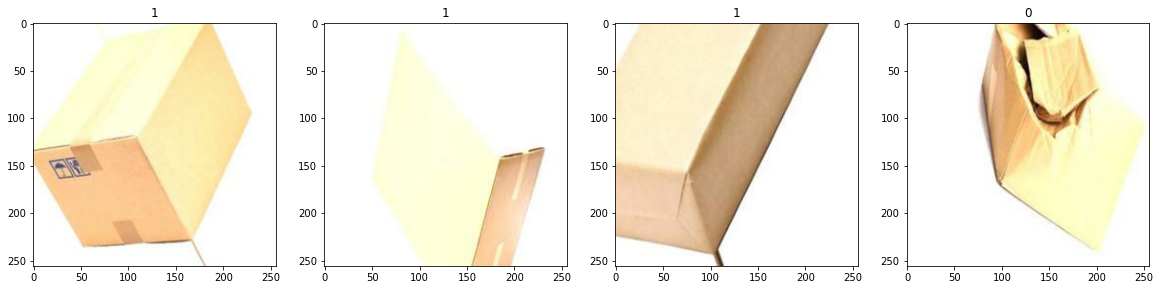

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 : Fine 


0 : Damaged

## Scaling the Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.43529412, 0.4392157 , 0.40784314],
          [0.44286153, 0.4467831 , 0.41541055],
          [0.45052084, 0.4544424 , 0.42306986],
          ...,
          [0.3019608 , 0.3217984 , 0.29365808],
          [0.3019608 , 0.3254902 , 0.28627452],
          [0.3019608 , 0.3254902 , 0.28627452]],
 
         [[0.44664523, 0.4505668 , 0.41919425],
          [0.4578633 , 0.46178487, 0.43041232],
          [0.47277963, 0.4767012 , 0.44532865],
          ...,
          [0.31353357, 0.33337122, 0.3052309 ],
          [0.31709558, 0.340625  , 0.3014093 ],
          [0.31709558, 0.340625  , 0.3014093 ]],
 
         [[0.45075062, 0.4546722 , 0.42329964],
          [0.4656637 , 0.46958527, 0.43821272],
          [0.48444974, 0.4883713 , 0.45699877],
          ...,
          [0.32807347, 0.3479111 , 0.31977078],
          [0.32133886, 0.34486827, 0.30565256],
          [0.32133886, 0.34486827, 0.30565256]],
 
         ...,
 
         [[0.80068934, 0.86343443, 0.8590533 ],
          [0.81872

## Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [16]:
len(data)

4

In [17]:
train_size

2

In [18]:
val_size


1

In [19]:
test_size

1

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
len(test)

1

## Building the Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training the Model

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=18, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/18
2/2 [==============================] - 4s 2s/step - loss: 1.5144 - accuracy: 0.4531 - val_loss: 0.7692 - val_accuracy: 0.3750
Epoch 2/18
2/2 [==============================] - 3s 2s/step - loss: 0.8453 - accuracy: 0.4062 - val_loss: 0.6881 - val_accuracy: 0.5312
Epoch 3/18
2/2 [==============================] - 3s 2s/step - loss: 0.6835 - accuracy: 0.5781 - val_loss: 0.6674 - val_accuracy: 0.5312
Epoch 4/18
2/2 [==============================] - 2s 1s/step - loss: 0.6780 - accuracy: 0.5312 - val_loss: 0.6763 - val_accuracy: 0.5000
Epoch 5/18
2/2 [==============================] - 3s 2s/step - loss: 0.6666 - accuracy: 0.6250 - val_loss: 0.6694 - val_accuracy: 0.7812
Epoch 6/18
2/2 [==============================] - 2s 1s/step - loss: 0.6779 - accuracy: 0.5938 - val_loss: 0.6503 - val_accuracy: 0.7812
Epoch 7/18
2/2 [==============================] - 3s 2s/step - loss: 0.6507 - accuracy: 0.7812 - val_loss: 0.6310 - val_accuracy: 0.7812
Epoch 8/18
2/2 [=========================

In [30]:
hist.history

{'loss': [1.5144375562667847,
  0.8452742099761963,
  0.6834884881973267,
  0.6780011653900146,
  0.6665787696838379,
  0.6779420971870422,
  0.6506883502006531,
  0.6245356202125549,
  0.5995708703994751,
  0.5627440214157104,
  0.5242601037025452,
  0.505946934223175,
  0.4469172954559326,
  0.3697226643562317,
  0.3288368582725525,
  0.24319487810134888,
  0.26101231575012207,
  0.14065085351467133],
 'accuracy': [0.453125,
  0.40625,
  0.578125,
  0.53125,
  0.625,
  0.59375,
  0.78125,
  0.796875,
  0.78125,
  0.765625,
  0.84375,
  0.828125,
  0.84375,
  0.890625,
  0.890625,
  0.96875,
  0.90625,
  0.96875],
 'val_loss': [0.7692049741744995,
  0.6880825757980347,
  0.6673901081085205,
  0.6762740612030029,
  0.6693990230560303,
  0.6502561569213867,
  0.6310420036315918,
  0.616447925567627,
  0.5831848978996277,
  0.5555187463760376,
  0.5126879215240479,
  0.5159230828285217,
  0.41130369901657104,
  0.40904152393341064,
  0.24855078756809235,
  0.2686974108219147,
  0.1865329

### Plotting the Performance

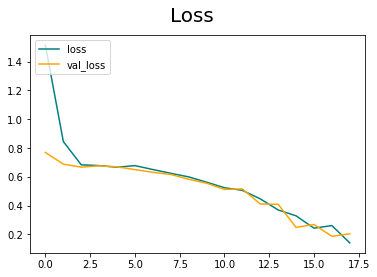

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

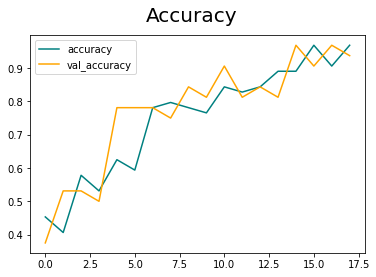

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating the Model

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 546ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.8235294, shape=(), dtype=float32) tf.Tensor(0.9032258, shape=(), dtype=float32)


## Testing the Model

In [37]:
import cv2

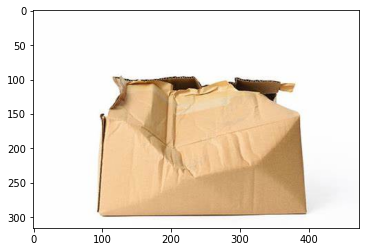

In [38]:
img = cv2.imread('test1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

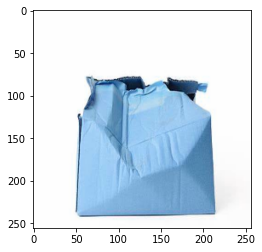

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 51ms/step


array([[0.08204579]], dtype=float32)

In [41]:
if yhat > 0.5: 
    print(f'Box is Fine')
else:
    print(f'Box is Damaged')

Box is Damaged


## Saving the Model

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','boxclassifier.h5'))

In [44]:
new_model = load_model('models/boxclassifier.h5')

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 192ms/step


array([[0.08204579]], dtype=float32)